In [ ]:
About Dataset
Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
It contains 76 attributes, including the predicted attribute,
but all published experiments refer to using a subset of 14 of them. 
The "target" field refers to the presence of heart disease in the patient. 
It is integer valued 0 = no disease and 1 = disease.

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report

In [2]:
hd=pd.read_csv(r"C:\Users\DELL\Downloads\archive (2)\heart.csv")

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
hd.shape

(1025, 14)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
hd.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hd['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [9]:
corrmat = hd.corr()
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [10]:
top_corr_features = corrmat.index
top_corr_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
plt.figure(figsize=(9,6))


<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

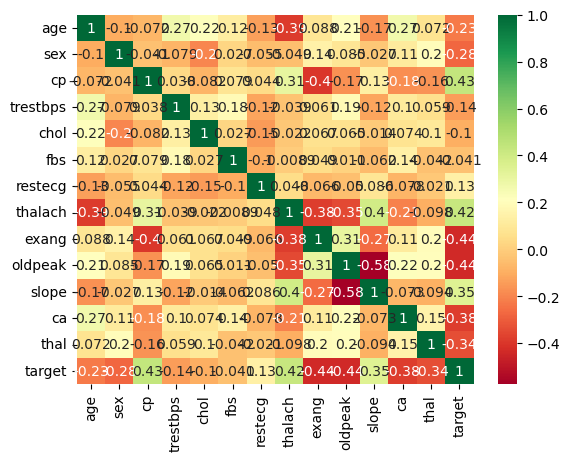

In [12]:
g = sns.heatmap(hd[top_corr_features].corr(),annot =True,cmap="RdYlGn")

## feature selection

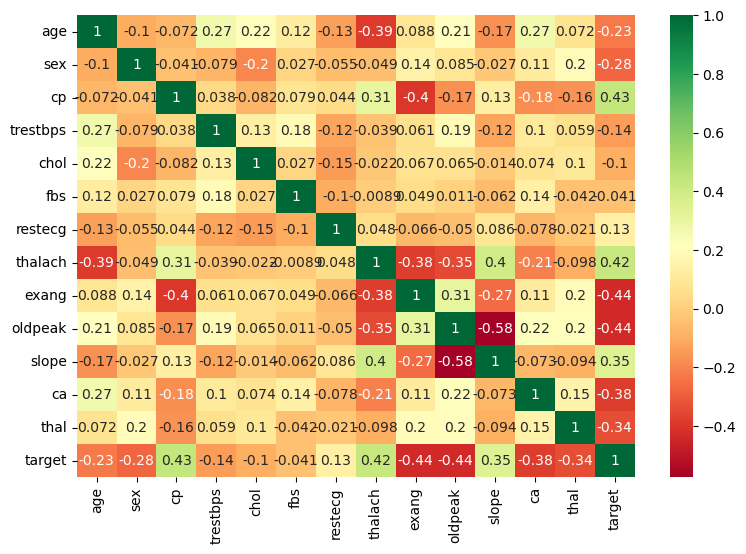

In [13]:
# get correlations of each features in dataset
corrmat = hd.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,6))
#plot heatmap
g = sns.heatmap(hd[top_corr_features].corr(),annot =True,cmap="RdYlGn")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
hd_train,hd_test = train_test_split(hd, test_size=.2)

In [16]:
hd_train_x = hd_train.iloc[:,0:-1]
hd_train_y = hd_train.iloc[:,-1]

hd_test_x = hd_test.iloc[:,0:-1]
hd_test_y = hd_test.iloc[:,-1]

In [17]:
hd.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [108]:
logreg.fit(hd_train_x,hd_train_y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
pred_test = logreg.predict(hd_test_x)

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report

In [111]:
confusion_matrix(hd_test_y,pred_test)

array([[86, 16],
       [11, 92]], dtype=int64)

In [112]:
print(classification_report(hd_test_y,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       102
           1       0.85      0.89      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [236]:
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# change input data to a numpy array

In [237]:
input_data_as_nparray= np.asarray(input_data)

#reshape numpy array as we r predicticting only on 1 instance 
 # reshape data as we r 

In [238]:
input_data_res =input_data_as_nparray.reshape(1,-1)

In [239]:
prediction = logreg.predict(input_data_res)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [240]:
print(prediction)

[1]


In [241]:
print(prediction)
if prediction[0]==0:
    print( ' no disease')
else:
    print('yes')

[1]
yes


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt  = DecisionTreeClassifier(criterion ='entropy', min_samples_split=13)

In [34]:
dt.fit(hd_train_x,hd_train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=13)

In [35]:
pred_test_dt = dt.predict(hd_test_x)

In [36]:
confusion_matrix(hd_test_y,pred_test_dt)

array([[100,   2],
       [  9,  94]], dtype=int64)

In [37]:
print(classification_report(hd_test_y,pred_test_dt))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       102
           1       0.98      0.91      0.94       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [199]:
dt.feature_importances_

array([0.11065553, 0.04190946, 0.30534688, 0.03839086, 0.06060695,
       0.        , 0.        , 0.06465064, 0.0284101 , 0.09210931,
       0.        , 0.17578828, 0.08213199])

In [204]:
df_feature_sig = pd.DataFrame()

In [205]:
df_feature_sig['Features']= hd_train_x.columns
df_feature_sig['Imp'] = dt.feature_importances_

In [208]:
df_feature_sig  = df_feature_sig.sort_values(['Imp'],ascending =False) 

In [209]:
df_feature_sig

,Features,Imp
2,cp,0.305347
11,ca,0.175788
0,age,0.110656
9,oldpeak,0.092109
12,thal,0.082132
7,thalach,0.064651
4,chol,0.060607
1,sex,0.041909
3,trestbps,0.038391
8,exang,0.028410


In [214]:
df_feature_sig.Imp[0:9].sum()

0.9715898972010787

In [128]:
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
rfc = RandomForestClassifier(n_estimators = 3,criterion= 'entropy')
rfc.fit(hd_train_x, hd_train_y)

pred_test_rfc = rfc.predict(hd_test_x)

tab_rfc =confusion_matrix(hd_test_y,pred_test_rfc)
tab_rfc

array([[101,   1],
       [  4,  99]], dtype=int64)

In [94]:
print(classification_report(hd_test_y,pred_test_rfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       102
           1       0.99      0.96      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [88]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [89]:
svc.fit(hd_train_x,hd_train_y)

SVC(kernel='linear')

In [90]:
pred_test_svc=svc.predict(hd_test_x)

In [91]:
confusion_matrix(hd_test_y,pred_test_svc)

array([[84, 18],
       [13, 90]], dtype=int64)

In [92]:
print(classification_report(hd_test_y,pred_test_svc))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.83      0.87      0.85       103

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=15)

In [79]:
knn.fit(hd_train_x, hd_train_y)

KNeighborsClassifier(n_neighbors=15)

In [80]:
pred_knn = knn.predict(hd_test_x)

In [81]:
confusion_matrix(hd_test_y , pred_knn)

array([[83, 19],
       [31, 72]], dtype=int64)

In [82]:
print(classification_report(hd_test_y, pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       102
           1       0.79      0.70      0.74       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



In [111]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(hd_train_x , hd_train_y)
pred_nb = nb.predict(hd_test_x)

tab_nb =confusion_matrix(hd_test_y, pred_nb)
tab_nb

array([[74, 31],
       [27, 73]], dtype=int64)

In [112]:
print(classification_report(hd_test_y, pred_nb))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       105
           1       0.70      0.73      0.72       100

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205

